In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
traindata = pd.read_csv("hr-total-cat-unbalanced.csv",index_col=0)

In [3]:
Y = traindata['is_promoted'].values
X_traindata = traindata.drop('is_promoted', axis=1)
X = X_traindata.values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

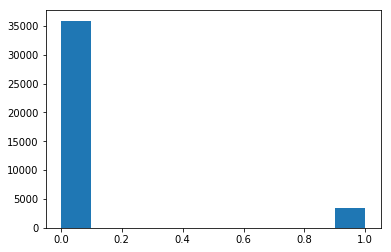

In [6]:
plt.hist(Y_train)
plt.show()

In [7]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
class_weightsl = class_weights.tolist()
class_weightsl

[0.5476144027646174, 5.75051214515657]

In [8]:
# Setup arrays to store train and test accuracies
depth = np.arange(10, 23, 2)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))

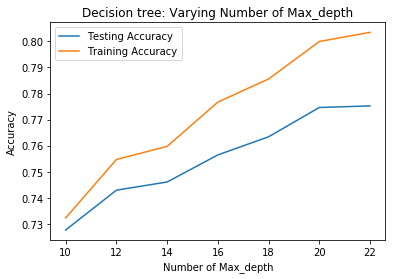

In [9]:
# Create instance (i.e. object) of Decision Tree classifier
# Loop over different values of k
for i, k in enumerate(depth):
    # Setup a Decision Tree classifier Classifier with max depth k
    clf_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=k, min_samples_leaf=25,class_weight={0:0.547614402764617, 1:5.75051214515657})
    
    clf_ent.fit(X_train,Y_train)
     #Compute accuracy on the training set
    train_accuracy[i] = clf_ent.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf_ent.score(X_test, Y_test)

# Generate plot
plt.title('Decision tree: Varying Number of Max_depth')
plt.plot(depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Max_depth')
plt.ylabel('Accuracy')
plt.show()

We choose the value of max_depth value where we get highest value of accuracy for test data

In [10]:
# Setup arrays to store train and test accuracies
samples = np.arange(10, 66,3)
train_accuracy = np.empty(len(samples))
test_accuracy = np.empty(len(samples))

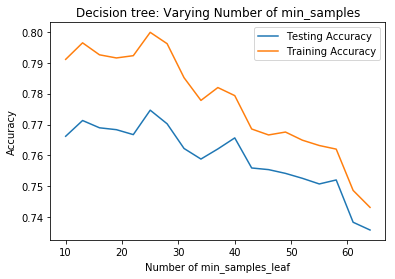

In [11]:
# Import module for fitting

# Create instance (i.e. object) of LogisticRegression
# Loop over different values of k
for i, k in enumerate(samples):
    # Setup a decision tree Classifier with k min_samples_leaf
    clf_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=20, min_samples_leaf=k, class_weight={0:0.547614402764617, 1:5.75051214515657})
    
    clf_ent.fit(X_train,Y_train)
     #Compute accuracy on the training set
    train_accuracy[i] = clf_ent.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf_ent.score(X_test, Y_test)

# Generate plot
plt.title('Decision tree: Varying Number of min_samples')
plt.plot(samples, test_accuracy, label = 'Testing Accuracy')
plt.plot(samples, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

We choose the value of min_samples_leaf value where we get highest value of accuracy for test data

We have gor highest acccuracy for combination of max_depth as 20 and min_samples_leaf as 25.

In [12]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=20, min_samples_leaf=25, class_weight={0:0.547614402764617, 1:5.75051214515657})

In [13]:
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.547614402764617, 1: 5.75051214515657},
            criterion='entropy', max_depth=20, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=25,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [14]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf_entropy, X, Y, cv=10)
print(cv_results)

[0.76035108 0.77427972 0.76092349 0.7620229  0.76526718 0.75629771
 0.76713113 0.75224279 0.77629319 0.76350449]


In [15]:
np.mean(cv_results)

0.7638313667426354

In [16]:
y_pred = clf_entropy.predict(X_test)
y_pred[0:20]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [17]:
df = pd.DataFrame(y_pred)

In [18]:
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/confusion-matrix.png", width=400)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[9269, 2702],
       [ 250,  879]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [21]:
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/precision-recall-f1score.png",width=500)

In [22]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     11971
           1       0.25      0.78      0.37      1129

   micro avg       0.77      0.77      0.77     13100
   macro avg       0.61      0.78      0.62     13100
weighted avg       0.91      0.77      0.82     13100



In [23]:
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.7746564885496183


In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

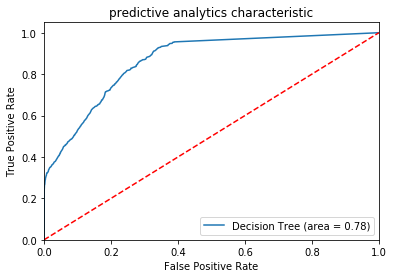

In [25]:
clf_entropy_roc_auc = roc_auc_score(Y_test, clf_entropy.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, clf_entropy.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % clf_entropy_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('predictive analytics characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Finding out using test data given in the problem set

In [26]:
X_testdata = pd.read_csv("test-hr-total-cat1.csv",index_col=0)

In [27]:
X_testdata1 = X_testdata.values

In [28]:
clf_entropy.fit(X, Y)

DecisionTreeClassifier(class_weight={0: 0.547614402764617, 1: 5.75051214515657},
            criterion='entropy', max_depth=20, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=25,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [29]:
final_prediction_unknown = clf_ent.predict(X_testdata1)
final_prediction_unknown[0:100]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [30]:
final_prediction_unknown = final_prediction_unknown.tolist()
X_testdata['prediction']=final_prediction_unknown
final = X_testdata['prediction']

In [31]:
final

employee_id
8724     1
74430    0
72255    0
38562    0
64486    0
46232    0
54542    0
67269    0
66174    0
76303    1
60245    1
42639    0
30963    0
54055    0
42996    1
12737    1
27561    0
26622    1
31582    0
29793    0
72735    0
5677     1
60889    0
51498    1
8566     0
53151    1
16203    1
61083    1
74849    0
13259    0
        ..
61754    0
72190    1
27155    0
15959    1
72900    1
57683    1
55174    0
51115    0
50134    1
59775    0
14408    0
4351     0
59625    1
29379    0
67979    0
61451    0
73871    0
52090    0
18488    0
59673    1
39410    0
11837    0
78278    1
49291    0
47537    0
53478    0
25600    0
45409    0
1186     0
5973     1
Name: prediction, Length: 22456, dtype: int64